# Simulación de la Producción de Energía Eólica

Este notebook simula la producción diaria de energía eólica en un futuro parque eólico proyectado en el Golfo San Jorge, ubicado en las provincia de Tierra del Fuego, Argentina. La simulación se basa en los datos meteorológicos históricos disponibles, específicamente en la **velocidad del viento** promedio, para calcular la producción de energía diaria en **MWh**.

Fuente:
https://www.mejorenergia.com.ar/noticias/2023/10/03/1991-tierra-del-fuego-obtiene-un-prestamo-de-us-65-millones-para-la-construccion-de-un-parque-eolico

## Pasos del proceso

1. **Carga de datos meteorológicos**: Cargamos los datos históricos de condiciones meteorológicas, como la velocidad del viento, temperatura, entre otros.
2. **Cálculo del factor de capacidad**: Utilizamos la velocidad del viento para estimar el **factor de capacidad** de las turbinas eólicas.
3. **Simulación de la producción diaria de energía**: Usamos la capacidad nominal de las turbinas para estimar la cantidad de energía producida cada día en **MWh**.
4. **Visualización**: Graficamos la producción diaria de energía para observar cómo varía a lo largo del tiempo.
5. **Exportación de resultados**: Guardamos los resultados de la simulación en un archivo CSV para su posterior uso en análisis o modelos predictivos.

---

### 1. Carga de Datos Meteorológicos

>Primero, cargamos el archivo de datos meteorológicos históricos, que contiene la información sobre la velocidad del viento y otros factores importantes como la temperatura y la humedad. Utilizamos `pandas` para trabajar con los datos.


In [18]:
import pandas as pd

# Cargar el dataset de datos meteorológicos
df_clima = pd.read_csv('../data/processed/datos_limpios.csv')

# Preprocesamiento básico (por ejemplo, eliminar columnas no necesarias)
df_clima = df_clima.drop(columns=['Lluvia Diaria', 'UV Máximo', 'Hora UV Máximo', 
                      'Minuto UV Máximo', 'Radiación Máxima', 'Hora Radiación Máxima', 
                      'Minuto Radiación Mínima', 'Dirección Viento', 'Dirección de Ráfaga'])

df_clima.head()  # Verificar las primeras filas del dataset


,Año,Mes,Día,Temp Media,Temp Máxima,Hora Temp Max,Minuto Temp Max,Temp Mínima,Hora Temp Min,Minuto Temp Min,Viento Medio,Ráfaga de Viento,Hora Viento,Minuto Viento,Presión Media
0,2016,1,1,10.3,11.2,20,40,9.2,1,30,11.7,29.0,6,55,1004.6
1,2016,1,2,11.8,18.1,19,30,8.6,0,55,22.0,69.2,15,20,996.2
2,2016,1,3,11.3,16.4,15,0,5.6,5,40,28.1,59.5,10,35,1004.3
3,2016,1,4,12.5,18.6,15,20,6.1,2,50,29.0,67.6,17,30,1004.1
4,2016,1,5,12.0,18.8,15,15,6.1,23,55,42.7,86.9,16,15,1005.4


### 2. Función para Calcular el Factor de Capacidad
   
>Para cada valor de la velocidad del viento en el dataset, calculamos un factor de capacidad que indica qué porcentaje de la capacidad nominal de la turbina se está utilizando. Este cálculo se realiza en función de la velocidad del viento, que tiene un impacto directo en la eficiencia de la turbina eólica.

In [19]:
# Función para calcular el factor de capacidad basado en la velocidad del viento (en km/h)
def calcular_factor_capacidad(velocidad_viento):
    if velocidad_viento < 4:  # Viento muy bajo
        return 0.2
    elif 4 <= velocidad_viento < 10:  # Viento moderado
        return 0.4
    elif 10 <= velocidad_viento < 15:  # Buen viento
        return 0.6
    elif 15 <= velocidad_viento < 25:  # Viento fuerte
        return 0.8
    else:  # Viento muy fuerte
        return 1.0


### 3. Cálculo de la Producción Diaria de Energía
>Usamos el factor de capacidad para calcular la producción diaria de energía en megavatios hora (MWh) basada en la capacidad nominal de las turbinas eólicas y las condiciones de viento promedio para cada día.

In [20]:
df_clima.columns

Index(['Año', 'Mes', 'Día', 'Temp Media', 'Temp Máxima', 'Hora Temp Max',
       'Minuto Temp Max', 'Temp Mínima', 'Hora Temp Min', 'Minuto Temp Min',
       'Viento Medio', 'Ráfaga de Viento', 'Hora Viento', 'Minuto Viento',
       'Presión Media'],
      dtype='object')

In [21]:
# Parámetros conocidos
capacidad_nominal = 33.6  # Capacidad máxima en MW (del parque eólico)
horas_por_dia = 24  # Operación durante 24 horas al día

# Calcular el factor de capacidad y producción diaria
df_clima['factor_capacidad'] = df_clima['Viento Medio'].apply(calcular_factor_capacidad)
df_clima['produccion_diaria_MWh'] = capacidad_nominal * df_clima['factor_capacidad'] * horas_por_dia

# Verificar los resultados
df_clima[['Año', 'Mes','Día', 'Viento Medio', 'factor_capacidad', 'produccion_diaria_MWh']].head()


,Año,Mes,Día,Viento Medio,factor_capacidad,produccion_diaria_MWh
0,2016,1,1,11.7,0.6,483.84
1,2016,1,2,22.0,0.8,645.12
2,2016,1,3,28.1,1.0,806.40
3,2016,1,4,29.0,1.0,806.40
4,2016,1,5,42.7,1.0,806.40


### 4. Visualización de la Producción de Energía
>Es útil graficar la producción diaria de energía para observar cómo varía a lo largo del tiempo, lo que nos permite identificar patrones o tendencias.

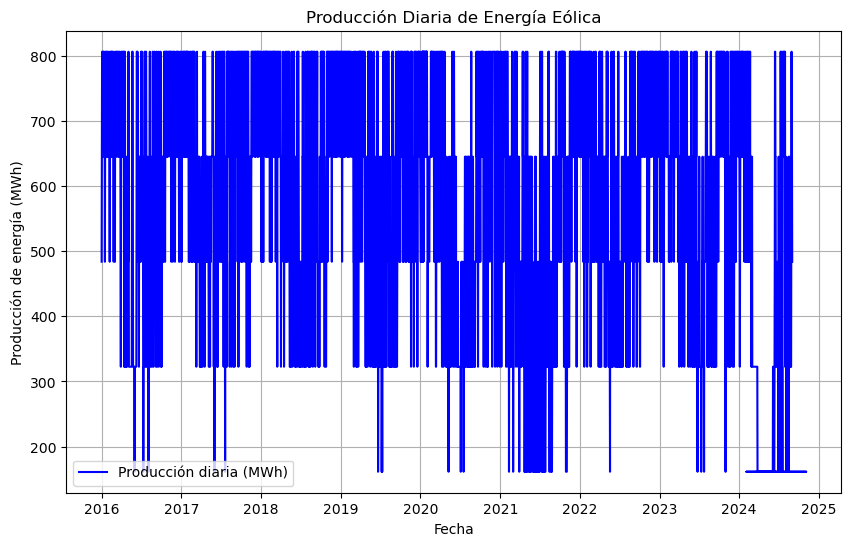

In [22]:
import matplotlib.pyplot as plt

# Crear un gráfico sin la columna 'Fecha', usando Año, Mes, y Día
plt.figure(figsize=(10,6))

# Usar un formato de fecha a partir de Año, Mes, y Día
plt.plot(pd.to_datetime(df_clima[['Año', 'Mes', 'Día']].astype(str).agg('-'.join, axis=1)),
         df_clima['produccion_diaria_MWh'], label='Producción diaria (MWh)', color='b')

plt.xlabel('Fecha')
plt.ylabel('Producción de energía (MWh)')
plt.title('Producción Diaria de Energía Eólica')
plt.legend()
plt.grid(True)
plt.show()

### 5. Exportación de Resultados
>Finalmente, guardamos los resultados simulados en un archivo CSV, que puede ser utilizado para realizar análisis adicionales y posteriormente entrenar modelos predictivos de machine learning.

In [23]:
# Guardar los resultados simulados en un archivo CSV dentro de la carpeta 'processed'
df_clima.to_csv('../data/processed/produccion_simulada_eolica.csv', index=False)
